## Importamos las bibliotecas necesarias

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

### Leemos los datos históricos de BTC desde un archivo CSV 

muetra las primeras 5 filas

In [117]:

ruta_archivo ="C:/Users/SILCA/OneDrive/Escritorio/dataset/BTC-USD.csv"
df = pd.read_csv(ruta_archivo)
print (df.head())

     Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  Precio_Cierre  \
0  21/3/16        413417999      413417999      410381012      413307007   
1  22/3/16        413131989      418375000      412531006      418088989   
2  23/3/16        418161011      419268005      417364014      418040985   
3  24/3/16        418424011      418679993      415485992      416394012   
4  25/3/16        416507996      418079987      415558014      417177002   

    Volumen  
0  61655400  
1  66813300  
2  61444200  
3  68346704  
4  52560000  


### verificamos la estructura del dataframe

In [118]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Fecha            2860 non-null   object
 1   Precio_Apertura  2860 non-null   int64 
 2   Precio_Máximo    2860 non-null   int64 
 3   Precio_Mínimo    2860 non-null   int64 
 4   Precio_Cierre    2860 non-null   int64 
 5   Volumen          2860 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 134.2+ KB
None


### Creamos una nueva columna llamada Precio_Promedio, la misma contiene una resta del Precio_Cierre con respecto al Precio_Apertura, que de como resultado 1 si el precio subió y 0 si bajó.

In [119]:
df['Precio_Promedio'] = df['Precio_Cierre'] - df['Precio_Apertura'] 
df['Precio_Promedio'] = df['Precio_Promedio'].apply(lambda x: 1 if x > 0 else 0)
print(df[['Fecha', 'Precio_Cierre', 'Precio_Apertura', 'Precio_Promedio']].head())


     Fecha  Precio_Cierre  Precio_Apertura  Precio_Promedio
0  21/3/16      413307007        413417999                0
1  22/3/16      418088989        413131989                1
2  23/3/16      418040985        418161011                0
3  24/3/16      416394012        418424011                0
4  25/3/16      417177002        416507996                1


### imprimimos el Dataframe con el que vamos a trabajar con la nueva columna Precio_Promedio

In [120]:
print (df)

        Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  Precio_Cierre  \
0     21/3/16        413417999      413417999      410381012      413307007   
1     22/3/16        413131989      418375000      412531006      418088989   
2     23/3/16        418161011      419268005      417364014      418040985   
3     24/3/16        418424011      418679993      415485992      416394012   
4     25/3/16        416507996      418079987      415558014      417177002   
...       ...              ...            ...            ...            ...   
2855  16/1/24      42499335938    43566273438    42085996094    43154945313   
2856  17/1/24      43132101563    43189890625    42189308594    42742652344   
2857  18/1/24      42742312500    42876347656    40631171875    41262058594   
2858  19/1/24      41278460938    42134160156    40297457031    41618406250   
2859  21/1/24      41671488281    41693160156    41615140625    41623695313   

          Volumen  Precio_Promedio  
0        61655


### Realizamos una descipcion estadistica basica de las distintas variables del set de datos, cantidad, media, devio standard, valor minimo, primer cuartil, segundo cuartil, tercer cuartil, valor maximo

In [121]:
df.describe()

,Precio_Apertura,Precio_Máximo,Precio_Mínimo,Precio_Cierre,Volumen,Precio_Promedio
count,2.860000e+03,2.860000e+03,2.860000e+03,2.860000e+03,2.860000e+03,2860.000000
mean,1.753150e+10,1.794107e+10,1.708981e+10,1.754421e+10,1.983118e+10,0.532168
std,1.639502e+10,1.678938e+10,1.594998e+10,1.639498e+10,1.925603e+10,0.499051
min,4.131320e+08,4.134180e+08,4.103810e+08,4.133070e+08,2.851400e+07,0.000000
25%,5.149431e+09,5.309813e+09,5.022376e+09,5.191103e+09,4.321641e+09,0.000000
50%,1.013023e+10,1.031331e+10,9.752529e+09,1.013478e+10,1.664998e+10,1.000000
75%,2.810506e+10,2.855431e+10,2.756884e+10,2.817002e+10,3.022172e+10,1.000000
max,6.754973e+10,6.878962e+10,6.638206e+10,6.756683e+10,3.509679e+11,1.000000


### df contiene las columnas 'Precio_Cierre' y 'Precio_Apertura'
### Preparamos los datos, los dividimos en x, y


In [122]:
X = df['Precio_Cierre'].values.reshape(-1, 1)
y = df['Precio_Apertura'].values  


### Dividimos en conjuntos de entrenamiento y prueba,  el 20% de los datos se utilizará como conjunto de prueba (test_size=0.2) y el 80% de los datos para entrenamiento

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creamos una instancia del modelo, elejimos el algoritmo de regresion lineal

In [124]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### Entrenamos el modelo

In [125]:
model.fit(X_train, y_train)


LinearRegression()

### Realizamos predicciones en los datos de prueba

In [126]:
y_pred = model.predict(X_test)


### Evalúamos el rendimiento del modelo, El Error Cuadrático Medio (MSE) mide la diferencia entre las predicciones del modelo y los valores reales. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.

In [127]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### El Coeficiente de Determinación (R²) indica cuánta varianza en la variable objetivo se explica por el modelo. Un valor cercano a 1 significa que el modelo se ajusta bien a los datos.

In [128]:
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 786999388882105344.00
Coeficiente de determinación (R²): 1.00


### Curvas de Aprendizaje, la utilizamos Para evaluar el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento, podemos trazar la puntuación de entrenamiento y prueba en función del tamaño del conjunto de datos.

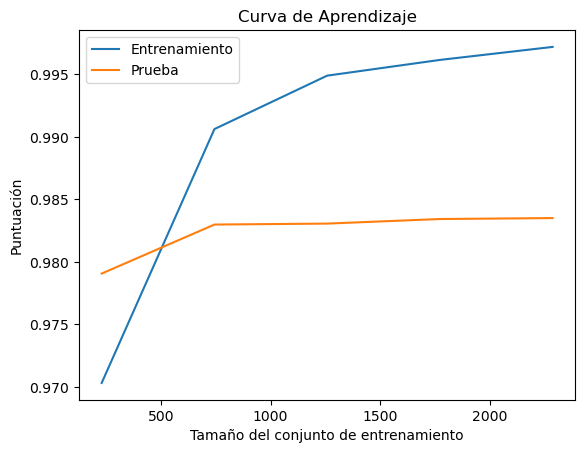

In [129]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Entrenamiento')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntuación')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()

#### La Curva de Aprendizaje muestra cómo cambia el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento. 

* Entrenamiento :
La línea azul representa el rendimiento del modelo en el conjunto de entrenamiento.
Al principio, con un conjunto de entrenamiento pequeño, el modelo se ajusta perfectamente a los datos (puntuación alta).
A medida que aumenta el tamaño del conjunto de entrenamiento, la puntuación disminuye. Esto sugiere que el modelo está encontrando más dificultades para ajustarse a los datos.
* Prueba:
La línea naranja representa el rendimiento del modelo en el conjunto de prueba (datos no vistos).
Al principio, con un conjunto de entrenamiento pequeño, el modelo no generaliza bien a los datos de prueba (puntuación baja).
Luego, la puntuación aumenta a medida que el conjunto de entrenamiento crece. Esto indica que el modelo está mejorando su capacidad de generalización.
* Sobreajuste:
Si hay una brecha significativa entre las dos líneas, podría indicar sobreajuste. El modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien.
Para abordar esto, considera reducir la complejidad del modelo o recopilar más datos.
* Subajuste:
Si ambas líneas están cerca y tienen un bajo rendimiento, podría indicar subajuste. El modelo no se ajusta lo suficiente a los datos.
En este caso, considera aumentar la complejidad del modelo o recopilar más datos.

### Histograma de Residuos Nos sirve Para analizar la distribución de los residuos (diferencia entre los valores reales y las predicciones)

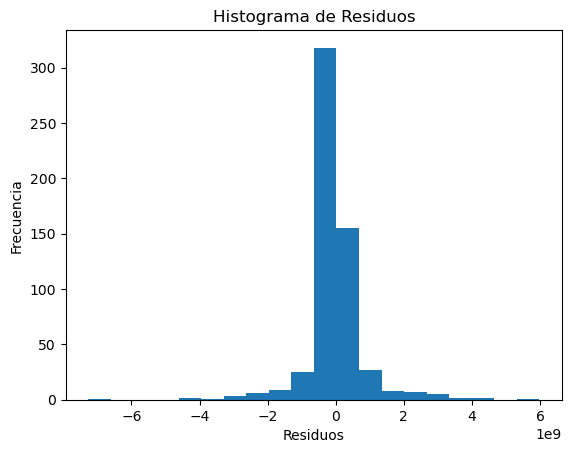

In [130]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()


#### La mayoría de los residuos están cerca de cero, lo que sugiere que el modelo está haciendo buenas predicciones en general. Encontramos que hay un valor atípico, en el extremo derecho del histograma, que es mucho más grande que los demás. Este valor atípico podría indicar un problema con un punto de datos específico o una característica inusual en los datos. 
* Eje X (Residuos): Representa los valores de los residuos. Los residuos son las diferencias entre los valores reales y las predicciones del modelo.
* Eje Y (Frecuencia): Muestra con qué frecuencia ocurre cada valor de residuo.

### Visualización de Boxplots:
Utilizamos un boxplot para visualizar los residuos. Los valores atípicos estarán fuera de los “bigotes” del boxplot, los valores que están significativamente alejados de cero.

<Axes: >

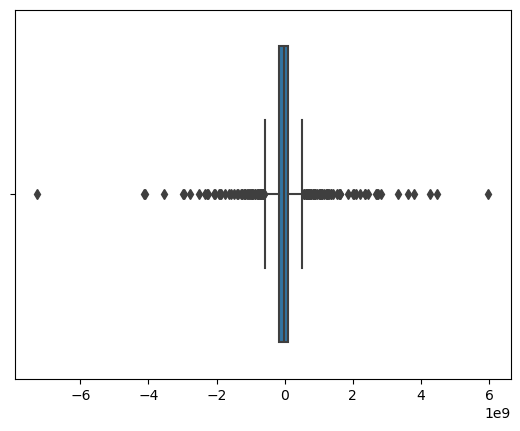

In [131]:
import seaborn as sns
sns.boxplot(x=residuals)


### Grafico de Regresion Lineal, trazamos los valores reales frente a las predicciones, para tener una idea visual de cómo se ajusta el modelo a los datos.

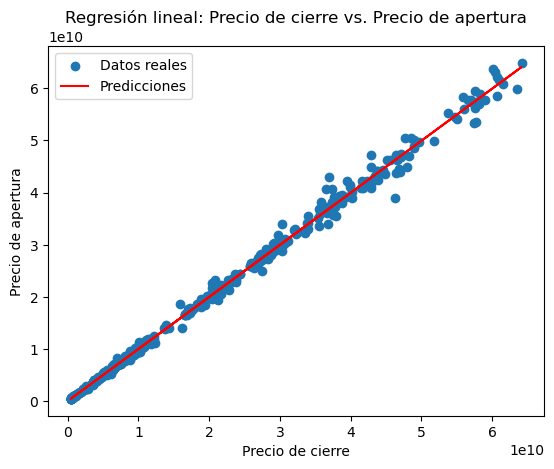

In [ ]:
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Precio de cierre')
plt.ylabel('Precio de apertura')  
plt.title('Regresión lineal: Precio de cierre vs. Precio de apertura')
plt.legend()
plt.show()


#### En el gráfico, se comparan el volumen con el precio de cierre del modelo de fregrecion lineal.

Los puntos azules representan una combinación de volumen y precio de cierre real. Estos puntos están distribuidos en el gráfico según los datos reales del conjunto de prueba. La línea roja representa las predicciones del modelo de regresión lineal. Esta línea muestra cómo el modelo estima el volumen en función del precio de cierre. Si los puntos azules están cerca de esta línea, significa que el modelo está haciendo buenas predicciones. Si hay una gran dispersión entre los puntos y la línea, podría ser necesario investigar más o ajustar el modelo.
Parece haber una relación positiva entre el volumen y el precio de cierre. A medida que el volumen aumenta, también lo hace el precio de cierre.

### Reemplazamos fecha_apertura por volumen, para ver si habia correlacion

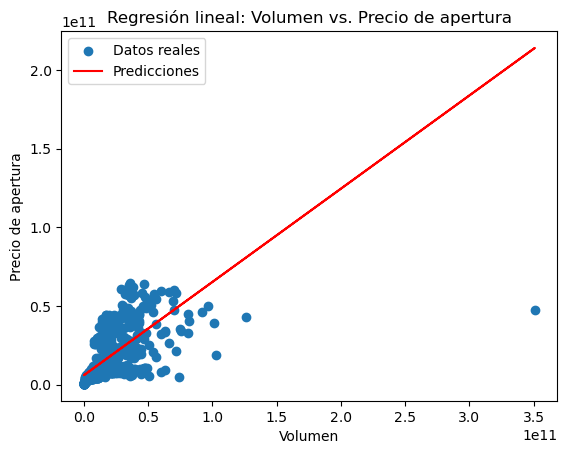

In [ ]:


X = df['Volumen'].values.reshape(-1, 1)
y = df['Precio_Apertura'].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Volumen')
plt.ylabel('Precio de apertura') 
plt.title('Regresión lineal: Volumen vs. Precio de apertura')
plt.legend()
plt.show()


##### En el gráfico, se comparan las predicciones del modelo de regresión lineal con los valores reales para la variable “Volumen” frente al “Precio de cierre”. 
Los puntos azules, representan un valor real de volumen y precio de cierre. Estos puntos se distribuyen en el gráfico según los datos reales del conjunto de prueba.La línea roja muestra las predicciones del modelo de regresión lineal. Esta línea representa cómo el modelo estima el volumen en función del precio de cierre. Si los puntos azules están cerca de esta línea, significa que el modelo está haciendo buenas predicciones. Si hay una gran dispersión entre los puntos y la línea, podría ser necesario ajustar el modelo o considerar otras características para mejorar la precisión.

### Grafica el precio de cierre a lo largo del tiempo

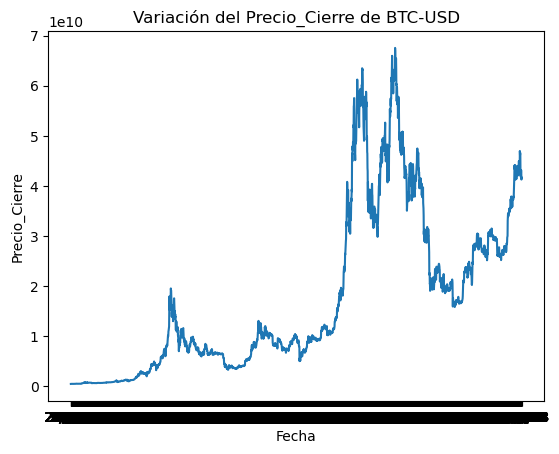

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Fecha'], df['Precio_Cierre'])
plt.xlabel('Fecha')
plt.ylabel('Precio_Cierre')
plt.title('Variación del Precio_Cierre de BTC-USD')
plt.show()


#### En el grafico se representa la variación del precio de cierre de Bitcoin (BTC-USD) a lo largo del tiempo.

Eje x=Fecha, la línea de tiempo se muestra en el eje horizontal. Cada punto en el gráfico corresponde a una fecha específica.
Eje y=Precio de cierre. el eje vertical muestra los valores del precio de cierre de BTC-USD. Los valores están en notación científica, lo que significa que el eje está escalado en potencias de diez (por ejemplo, 1e10 representa 10 mil millones).
Tendencia general, Se observan fluctuaciones significativas en el precio de cierre. Hay un aumento notable seguido de cierta volatilidad.
Interpretación: Este gráfico puede ser relevante para el análisis económico o para considerar inversiones en Bitcoin. Se puede ver cómo el precio ha cambiado con el tiempo y asi evaluar tendencias o patrones.